# Biophysics Problem Set 5 - Wright-Fisher Dynamics

# William Cerny

In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm.notebook import tqdm

# Problem 1

### Here, I do everything in terms of functions such that I can swap out the function that creates the next generation when it comes time to add selection.

### As with last time, 0 = 'a' and 1 = 'A'. I generate an initial sequence randomly using the following function:

In [2]:
def genStartingPopulation(n, n_a):
    assert n>1 
    
    ## generate an array of 1s and flip n_a of them to 0
    startingPop = np.ones(n)
    
    for i in range(n_a):
        startingPop[i] = 0 
 
    return startingPop

### A function to count the number of n_a quickly:

In [3]:
def count_n_a(population):
    p = 1-population
    return int(np.sum(p))

### Test them:

In [4]:
genStartingPopulation(n = 5,n_a = 3)

array([0., 0., 0., 1., 1.])

In [5]:
a = genStartingPopulation(10,1)
a

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
count_n_a(a)

1

### Function to Iterate Population, no selection effects:

In [7]:
def iteratePopulationNoSelection(existing_population):
    
    ## Randomly Select indices within the population to be carried over to next generation.
    ## This definitely can pick the same index twice, so replacement is built in.
    indicesToCopy = np.random.randint(0,len(existing_population),len(existing_population))

    ### Select 1s and 0s from the existing population corresponding to those indices
    newpopulation = [existing_population[index] for index in indicesToCopy]
    
    return np.array(newpopulation)

In [8]:
def runSimulation(n,n_a_start,timesteps):
    
    times = np.arange(timesteps+1)
    history = []
    history.append(n_a_start)
    
    population = genStartingPopulation(n = n, n_a = n_a_start) ## Generate starting population
 
    for step in range(timesteps):
        population = iteratePopulationNoSelection(population)
        count = count_n_a(population)
        history.append(count)

        
    return times, np.array(history)
    

In [9]:
a,b = runSimulation(24,12,100)
combined = tuple([a,b])

Text(0, 0.5, "Number of Type 'a' Organisms")

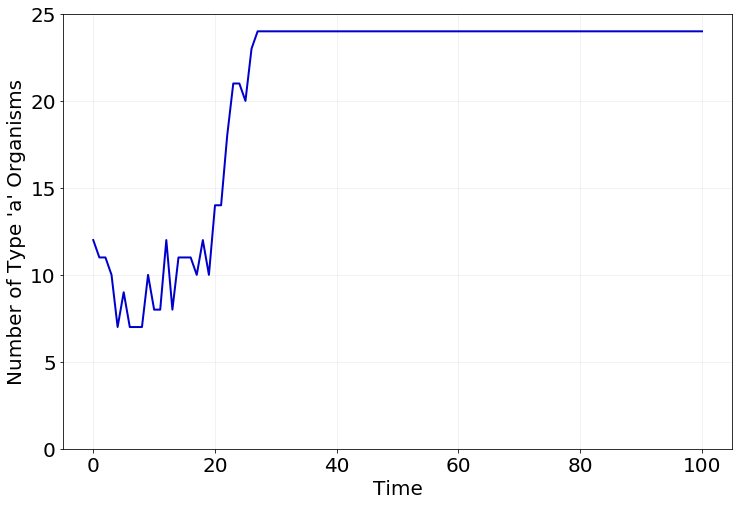

In [10]:
plt.figure(figsize = (12,8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0,25)
plt.grid(alpha = .2)
plt.plot(a,b, color = 'mediumblue', lw = 2)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Number of Type \'a\' Organisms', fontsize = 20)

## Now run many simulations:

In [11]:
resultsX = []
resultsY = []

plt.figure(figsize = (25,11))
for i in range(1000):
    a,b = runSimulation(30,15,100)
    resultsX.append(a)
    resultsY.append(b)
    
    del a,b

<Figure size 1800x792 with 0 Axes>

Text(0, 0.5, "Number of type 'a'")

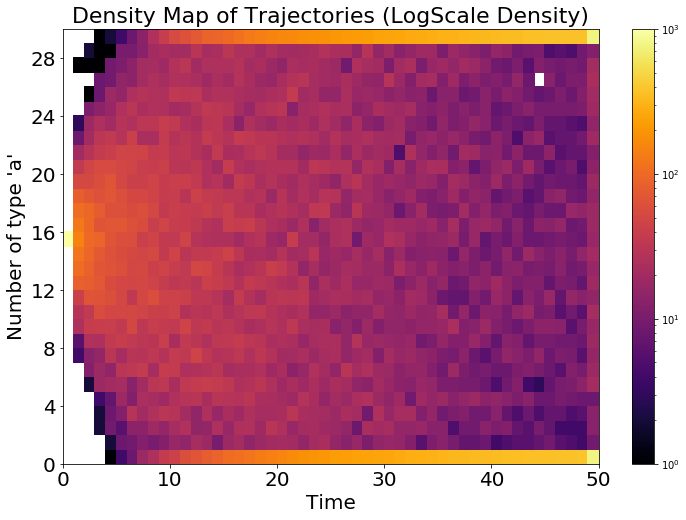

In [12]:
plt.figure(figsize = (12,8))
_ = plt.hist2d(np.concatenate(resultsX), np.concatenate(resultsY), cmap = 'inferno', bins= (np.linspace(0,50,51),30), norm = LogNorm())
plt.colorbar()
plt.title('Density Map of Trajectories (LogScale Density)', fontsize = 22)

plt.xticks(fontsize = 20)
plt.yticks(np.arange(8)*4, fontsize = 20)
plt.ylim(0,30)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Number of type \'a\'',fontsize = 20)

In [13]:
means = []
variances = []

for i in range(101):
    step = [x[i] for x in resultsY]
    mean = np.mean(step)
    variance = np.var(step)
    means.append(mean)
    variances.append(variance)
    del step

Text(0, 0.5, 'Variance')

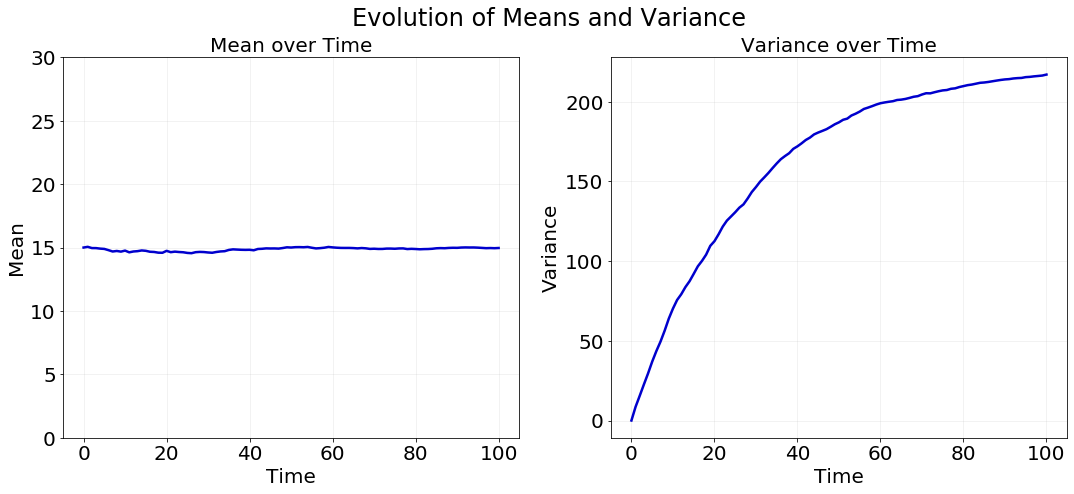

In [14]:
plt.figure(figsize = (18,7))
plt.suptitle('Evolution of Means and Variance', fontsize = 24)

plt.subplot(1,2,1)
plt.title('Mean over Time', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(np.arange(101), means, color = 'mediumblue', lw = 2.5)
plt.ylim(0,30)
plt.grid(alpha = .2)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Mean', fontsize = 20)

plt.subplot(1,2,2)
plt.title('Variance over Time', fontsize = 20)
plt.plot(np.arange(101), variances, color = 'mediumblue', lw = 2.5)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(alpha = .2)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Variance', fontsize = 20)

## Previously, I used N = 30. Now I try N = 2000 across 4000 steps. I use 200 different walkers and average results again.

In [15]:
resultsX = []
resultsY = []

for i in tqdm(range(200)):
    a,b = runSimulation(2000,1000,4000)
    resultsX.append(a)
    resultsY.append(b)
    
    del a,b

Text(0, 0.5, "Number of type 'a'")

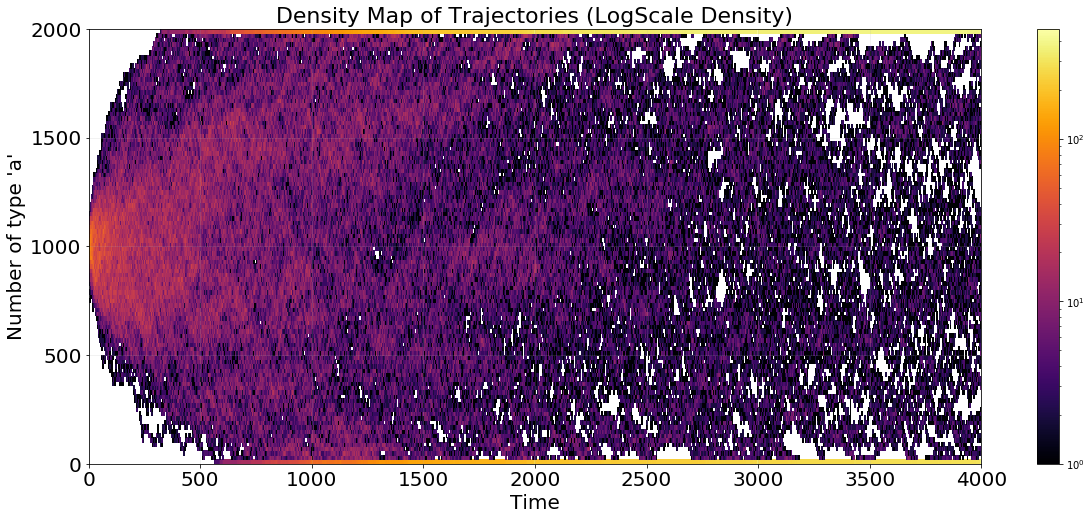

In [16]:
plt.figure(figsize = (20,8))
_ = plt.hist2d(np.concatenate(resultsX), np.concatenate(resultsY), cmap = 'inferno', bins= (np.linspace(0,4000,1000),100), norm = LogNorm())
plt.colorbar()
plt.title('Density Map of Trajectories (LogScale Density)', fontsize = 22)
plt.xlim(0,4000)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(7)*500, fontsize = 20)
plt.ylim(0,2000)
plt.grid(alpha = .2)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Number of type \'a\'',fontsize = 20)

In [17]:
means = []
variances = []

for i in range(4001):
    step = [x[i] for x in resultsY]
    mean = np.mean(step)
    variance = np.var(step)
    means.append(mean)
    variances.append(variance)
    del step

Text(0, 0.5, 'Variance')

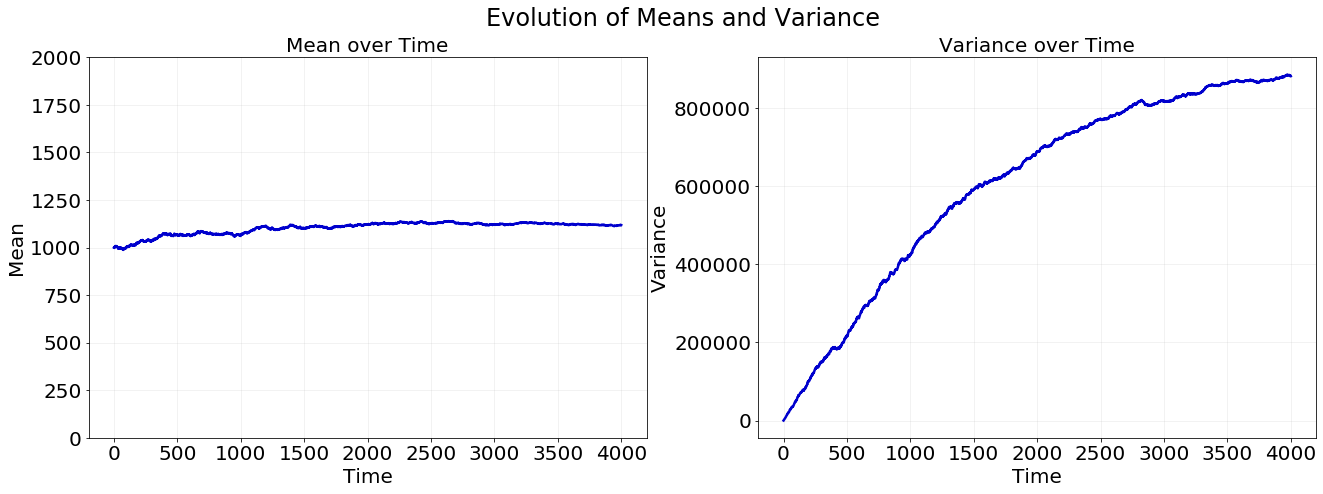

In [18]:
plt.figure(figsize = (22,7))
plt.suptitle('Evolution of Means and Variance', fontsize = 24)

plt.subplot(1,2,1)
plt.title('Mean over Time', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(np.arange(4001), means, color = 'mediumblue', lw = 2.5)
plt.ylim(0,2000)
plt.grid(alpha = .2)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Mean', fontsize = 20)

plt.subplot(1,2,2)
plt.title('Variance over Time', fontsize = 20)
plt.plot(np.arange(4001), variances, color = 'mediumblue', lw = 2.5)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(alpha = .2)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Variance', fontsize = 20)

# How does Variance Scale with N? Trying N in intervals of 10 from [10, 200], with a long number of timesteps of 1000 to allow for all populations to reach the state of fixation. I will run 100 walkers for each N.

In [19]:
final_variances = [] 
Nvals = np.linspace(10,300,20)

for N in tqdm(Nvals): 
    resultsY = []
    for i in range(100):
        a,b = runSimulation(int(N),int(N/2),1000)
        final_n_a = b[-1]
        resultsY.append(b)
        del a,b
    variance = np.var(resultsY)
    final_variances.append(variance)

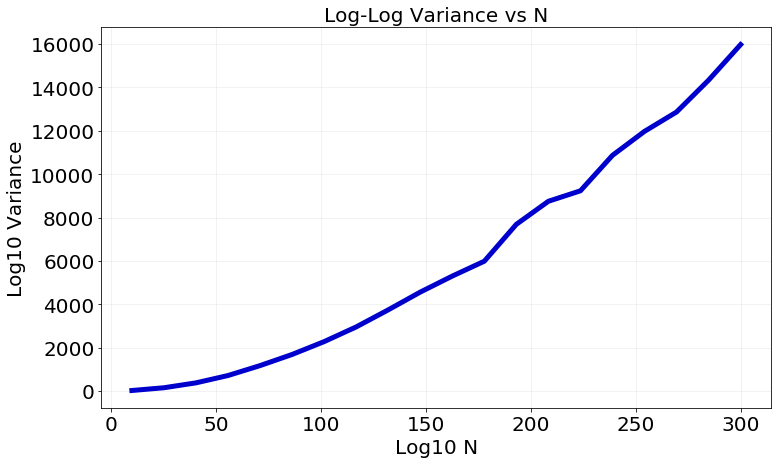

In [20]:
plt.figure(figsize = (12,7))
plt.title('Log-Log Variance vs N', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(alpha = .2)
plt.xlabel('Log10 N', fontsize = 20)
plt.ylabel('Log10 Variance', fontsize = 20)
# plt.ylim(0,20000)
plt.plot(Nvals,final_variances, color = 'mediumblue', label = 'Data', lw = 5)



## The above graph makes clear that the relationship between (fixation) Variance and N must be approximately Variance ~N^2. This can also be shown graphically as:


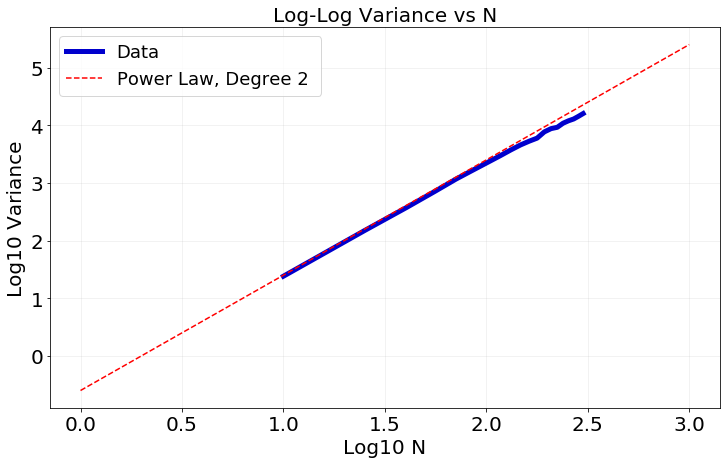

In [21]:
plt.figure(figsize = (12,7))
plt.title('Log-Log Variance vs N', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(alpha = .2)
plt.xlabel('Log10 N', fontsize = 20)
plt.ylabel('Log10 Variance', fontsize = 20)
# plt.ylim(0,20000)
plt.plot(np.log10(Nvals),np.log10(final_variances), color = 'mediumblue', label = 'Data', lw = 5)

x = np.linspace(0,3,10)
y = 2*(x-.3)
plt.plot(x,y,color = 'red', label = 'Power Law, Degree 2 ', ls = '--')
plt.legend(fontsize = 18)

# Please see scanned pdf for analytic part of Q1.

# ----------------------------------------------------------------------------------------------------------

# Question 2 

#### N.B: I use the word "walkers" in this section ocassionally to represent how many simulations I run.

In [22]:
import random

In [23]:
def iteratePopulation_withSelection(existing_population,fa,fA):
    '''
    Selection is now implemeneted. Begin by constructing an egg pool by allowing each type a and each type A
    to reproduce to give f_a and f_A eggs respectively. Then randomly sample from that egg pool. 
    This encapsulates the fitness effect since more 'a' exist if f_a > f_A and still has the random selection
    effect to select a finite number to enter the population for the next generation.
    '''
    assert fa > 0
    assert fA > 0
    
    ## Construct Egg pool 
    n_a = count_n_a(existing_population)
    n_A = len(existing_population) - n_a
    length_a = int(n_a * fa)
    length_A = int(n_A * fA)
    new_a = np.zeros(length_a)
    new_A = np.ones(length_A)
    new_sampling_array = np.concatenate([new_a,new_A])
  
    random.shuffle(new_sampling_array)


    ## copy N individuals with replacement from expanded sampling eggpool
    indicesToCopy = np.random.randint(low = 0,high = len(new_sampling_array),size  = len(existing_population))
    newpopulation = [new_sampling_array[index] for index in indicesToCopy]
    
    return np.array(newpopulation)

In [24]:
def runSimulation_v2(n,n_a_start,maxtimesteps, f_a, f_A):
    '''
    Similar to runSimulation, but now adds fitness based selection. 
    Also, I stop taking steps after fixation so as to speed up runtimes.
    If type a fixates, also return 1. Else return 0.
    '''

    
    population = genStartingPopulation(n = n, n_a = n_a_start) ## Generate starting population
    
    
    count = -999 ## initialization case
    stepcounter = 1 
    while (stepcounter < maxtimesteps):
        times.append(stepcounter)
        population = iteratePopulation_withSelection(population,fa = f_a, fA = f_A)
        count = count_n_a(population)
        history.append(count)
        stepcounter += 1
        
        if count == n:      
            return  1 ## notate if it fixates
        elif count == 0:      
            return 0
        else: continue
            
    return  0

## Starting with N=6000 (runtimes got too bad so I figure this is large enough to still be suffiicently large for sake of comparison):

## run 500 steps which is an excessive enough amount of steps such that everything fixates in either direction, or such that at least the estimated ratio is mostly correct up to some slow-fixating walkers. Then calculate ratio of number of simulations that fixate to fitter type/number of simulations)

## Repeat for values of f(a) between 1.02 and 1.1


In [43]:
%%script false --no-raise-error
numwalkers = 80
finalRatios = []
fa_vals = [1.001] + 5* np.arange(6)/1000.
print(fa_vals)

for f in tqdm(fa_vals):

    fixate = 0
    for i in range(numwalkers):
        c = runSimulation_v2(6000,3000,maxtimesteps = 500,f_a = f, f_A = 1.)
        fixate += c 
  
    finalRatios.append(fixate)

finalRatios =  np.array(finalRatios) / numwalkers

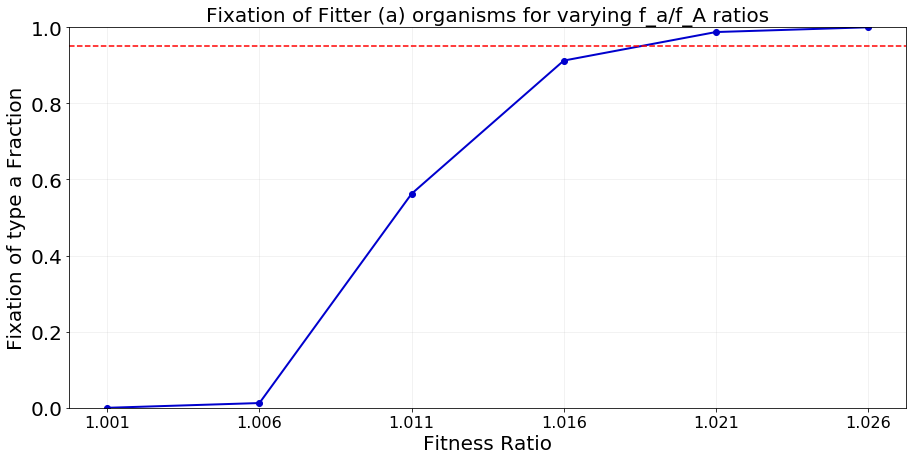

In [42]:
plt.figure(figsize = (15,7))

plt.ylim(0,1)
plt.title('Fixation of Fitter (a) organisms for varying f_a/f_A ratios', fontsize = 20)
plt.xticks(fa_vals,fontsize = 16)
plt.yticks(fontsize = 20)


plt.grid(alpha = .2)
plt.xlabel('Fitness Ratio', fontsize = 20)
plt.ylabel('Fixation of type a Fraction', fontsize = 20)

plt.plot(fa_vals,finalRatios, lw = 2, color = 'mediumblue', marker = 'o')
plt.axhline(.95, color = 'red', ls = '--')


### It appears that the 95% type 'a' fixation fraction is 1.018.

# Now for N=100:

### run 400 steps which is an excessive enough amount of steps such that everything fixates in either direction. 


In [31]:
numwalkers = 300
finalRatios = []
fa_vals = [1.01] + np.arange(10)/100.


for f in tqdm(fa_vals):
    fixate = 0
    for i in range(numwalkers):
        c = runSimulation_v2(100,50,maxtimesteps = 400,f_a = f, f_A = 1.)
        fixate += c 
   
    finalRatios.append(fixate)

finalRatios =  np.array(finalRatios) / numwalkers    
    
    
    # print('Percentage of ')

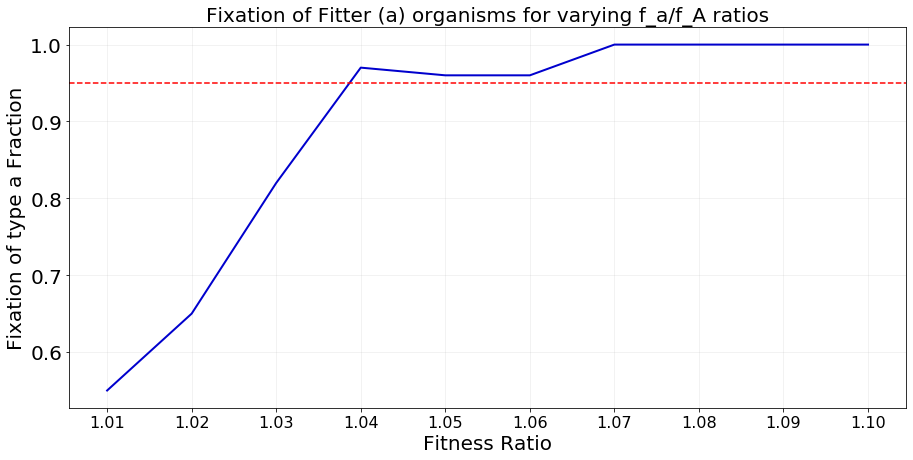

In [32]:
plt.figure(figsize = (15,7))


plt.title('Fixation of Fitter (a) organisms for varying f_a/f_A ratios', fontsize = 20)
plt.xticks(fa_vals,fontsize = 16)
plt.yticks(fontsize = 20)


plt.grid(alpha = .2)
plt.xlabel('Fitness Ratio', fontsize = 20)
plt.ylabel('Fixation of type a Fraction', fontsize = 20)

plt.plot(fa_vals,finalRatios, lw = 2, color = 'mediumblue')
plt.axhline(.95, color = 'red', ls = '--')


### It seems that the 95% fixation of the fitter type 'a' is achieved at ~1.038 usually (< 4% advantage). Nonetheless, it can be argued that the finite population size fluctuations are overwhelmed even at the starting ratio of 1.01, where ~55% of simulations converge to type A.

# ----------------------------------------------------------------------------------------------------------

# Lastly: now setting n_a to 1.

### Starting with N = 100 case, once again using a very large 1000 steps per simulation and 10000 simulations total:

In [33]:
numwalkers = 10000

fixate = 0
for i in tqdm(range(numwalkers)):
    c = runSimulation_v2(100,1,maxtimesteps = 1000,f_a = 1.1, f_A = 1.)
    fixate += c 

print('Probability of type a fixation at N= 100 and fa/fA = 1.1 is: ', fixate/numwalkers)


Probability of type a fixation at N= 100 and fa/fA = 1.1 is:  0.064



### Now N= 10,000 case, using a very large 2000 steps per simulation and 1000 simulations total:

In [44]:
numwalkers = 1000

fixate = 0
for i in tqdm(range(numwalkers)):
    c = runSimulation_v2(10000,1,maxtimesteps = 1000,f_a = 1.1, f_A = 1.)
    fixate += c 
  

print('Probability of type a fixation at N= 10000 and fa/fA = 1.1 is: ', fixate/numwalkers)


Probability of type a fixation at N= 10000 and fa/fA = 1.1 is:  0.075


## From the above, it is clear that the N=10000 has a slightly larger probability of type a fixation, although not by much margin.